Logistic Regression (For Binary/Multiclass Classification)

	Steps:
		1.Choose a classification target (e.g., converting NPHR into a binary/multiclass target if needed).
		2.Preprocess the data (handle missing values, scale features).
		3.Train and evaluate the Logistic Regression model.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
file_path = './dataset_combined_final.xlsm'
data = pd.read_excel(file_path)

# Inspect the dataset
print(data.head())
print(data.info())

   Unnamed: 0    Tanggal  Main steam flow (t/h)  \
0           1 2024-01-01             829.895767   
1           2 2024-01-02             836.935916   
2           3 2024-01-03             828.634270   
3           4 2024-01-04             830.700920   
4           5 2024-01-05             840.836756   

   Main steam temperature (boiler side) (℃)  \
0                                566.840549   
1                                566.881735   
2                                567.291646   
3                                566.777897   
4                                566.164801   

   Main steam pressure (boiler side) (Mpa)  \
0                                14.459605   
1                                14.382862   
2                                14.598511   
3                                14.672297   
4                                14.718665   

   Reheat steam temperature (boiler side) (℃)  \
0                                  565.474815   
1                                  

In [7]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing values by filling with the mean
data.fillna(data.mean(), inplace=True)

# Extract useful features from 'Tanggal' (date column)
data['Year'] = data['Tanggal'].dt.year
data['Month'] = data['Tanggal'].dt.month
data['Day'] = data['Tanggal'].dt.day

# Drop the original datetime column
data.drop(columns=['Tanggal'], inplace=True)

In [8]:
# Calculate correlations with the target variable
target = 'NPHR (Kcal/Kwh)'
correlation = data.corr()[target].sort_values(ascending=False)

# Display top correlated features
top_features = correlation.head(15).index.tolist()
print("Top Features Correlated with NPHR:")
print(correlation.head(15))

Top Features Correlated with NPHR:
NPHR (Kcal/Kwh)                                1.000000
NTHR (Kcal/Kwh)                                0.998191
Energy Input From Boiler (Kcal/h)              0.878786
Coal Flow (t/h)                                0.875741
NPHR_Class                                     0.820520
Superheater desuperheating water flow (t/h)    0.610384
Condenser vacuum (kPa)                         0.603272
Reheat steam pressure (turbine side) (MPa)     0.532259
High exhaust pressure (Mpa)                    0.525490
Main steam flow (t/h)                          0.525321
Cold Reheat Pressure (Mpa)                     0.512148
APH Leakage (%)                                0.486613
Nox (mg/m3)                                    0.483610
Velocity (m/s)                                 0.451944
Flow rate (KNm3/h)                             0.451944
Name: NPHR (Kcal/Kwh), dtype: float64


In [9]:
# Example: Converting NPHR into binary classification
data['NPHR_Class'] = (data['NPHR (Kcal/Kwh)'] > data['NPHR (Kcal/Kwh)'].median()).astype(int)

# Features and target
X = data[top_features].drop(columns=['NPHR (Kcal/Kwh)', 'NPHR_Class'])
y = data['NPHR_Class']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = logistic_model.predict(X_test_scaled)



In [11]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[ 7  0]
 [ 2 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.83      0.91        12

    accuracy                           0.89        19
   macro avg       0.89      0.92      0.89        19
weighted avg       0.92      0.89      0.90        19

Accuracy: 0.89


K-Means Clustering (For Unsupervised Clustering)

	Steps:
		1.	Standardize features (K-Means is sensitive to scale).
		2.	Choose the number of clusters (k) using methods like the Elbow Method.
		3.	Fit the K-Means model and analyze cluster assignments.

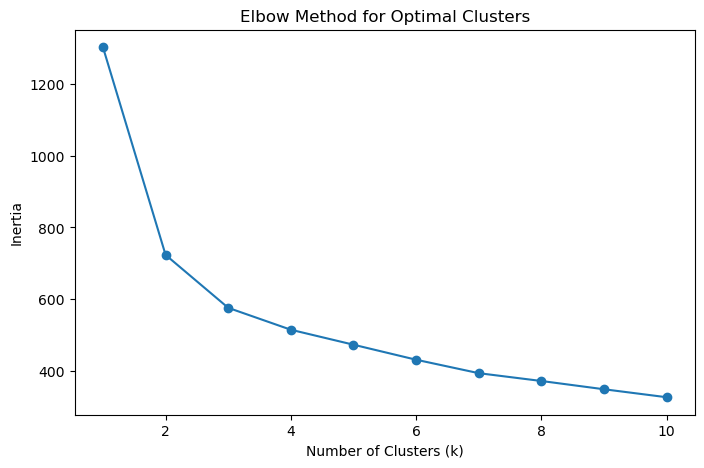

Cluster
2    38
0    36
1    19
Name: count, dtype: int64


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[top_features].drop(columns=['NPHR (Kcal/Kwh)']))

# Determine optimal clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Fit K-Means with optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster assignments
print(data['Cluster'].value_counts())

Decision Trees (For Classification or Regression)

Steps:
	1.	Use the dataset for either classification or regression tasks.
	2.	Train a Decision Tree model and evaluate performance.

Code for Classification:

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")


Confusion Matrix:
[[ 7  0]
 [ 1 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        12

    accuracy                           0.95        19
   macro avg       0.94      0.96      0.94        19
weighted avg       0.95      0.95      0.95        19

Accuracy: 0.95


Key Notes:

	1.	Logistic Regression:
	•	Ideal for classification tasks (e.g., predicting if NPHR is high or low).
	•	Requires categorical or binarized target values.
	
    2.	K-Means Clustering:
	•	Unsupervised learning for grouping data into clusters based on similarity.
	•	Useful for exploratory data analysis or identifying patterns.
	
    3.	Decision Trees:
	•	Flexible for both classification and regression tasks.
	•	Provides interpretable results, especially with feature importance.
